# Creating and Backtesting Stochastic Oscillator Strategies

## Getting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn")
#!pip install pandas_datareader
import pandas_datareader.data as web

In [74]:
start= pd.to_datetime('2016-01-01')
end= pd.to_datetime('2021-03-01')
data = web.DataReader('BTC-USD','yahoo',start, end)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,436.246002,427.515015,430.721008,434.334015,36278900.0,434.334015
2016-01-02,436.062012,431.869995,434.622009,433.437988,30096600.0,433.437988
2016-01-03,433.743011,424.705994,433.578003,430.010986,39633800.0,430.010986
2016-01-04,434.516998,429.084015,430.061005,433.091003,38477500.0,433.091003
2016-01-05,434.182007,429.675995,433.069000,431.959991,34522600.0,431.959991


In [75]:
data.drop(['Volume','Adj Close'], axis=1,inplace=True)
data

,High,Low,Open,Close
Date,,,,
2016-01-01,436.246002,427.515015,430.721008,434.334015
2016-01-02,436.062012,431.869995,434.622009,433.437988
2016-01-03,433.743011,424.705994,433.578003,430.010986
2016-01-04,434.516998,429.084015,430.061005,433.091003
2016-01-05,434.182007,429.675995,433.069000,431.959991
...,...,...,...,...
2021-02-26,48370.785156,44454.843750,47180.464844,46339.761719
2021-02-27,48253.269531,45269.027344,46344.773438,46188.453125
2021-02-28,46716.429688,43241.617188,46194.015625,45137.769531


In [76]:
data.to_csv("BTC.csv")

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1884 entries, 2016-01-01 to 2021-03-02
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    1884 non-null   float64
 1   Low     1884 non-null   float64
 2   Open    1884 non-null   float64
 3   Close   1884 non-null   float64
dtypes: float64(4)
memory usage: 73.6 KB


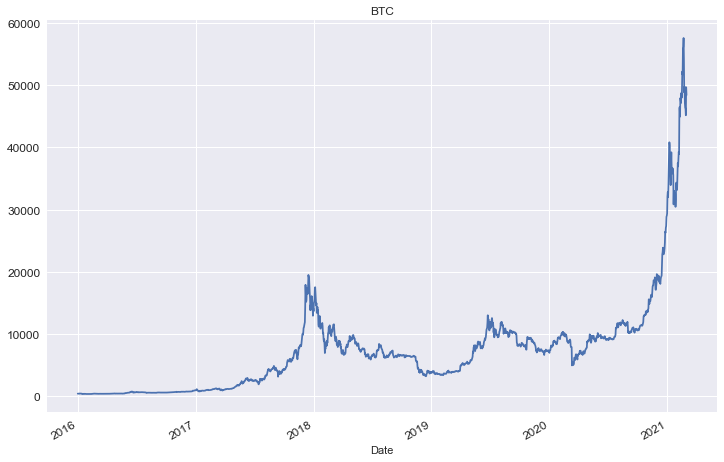

In [78]:
data.Close.plot(figsize = (12, 8), title = "BTC", fontsize = 12)
plt.show()

## Defining an SO Strategy

In [79]:
data

,High,Low,Open,Close
Date,,,,
2016-01-01,436.246002,427.515015,430.721008,434.334015
2016-01-02,436.062012,431.869995,434.622009,433.437988
2016-01-03,433.743011,424.705994,433.578003,430.010986
2016-01-04,434.516998,429.084015,430.061005,433.091003
2016-01-05,434.182007,429.675995,433.069000,431.959991
...,...,...,...,...
2021-02-26,48370.785156,44454.843750,47180.464844,46339.761719
2021-02-27,48253.269531,45269.027344,46344.773438,46188.453125
2021-02-28,46716.429688,43241.617188,46194.015625,45137.769531


The __Stochastic Oscillator Indicator__ consists of two different lines/oscillators that are bounded by __0 and 100__: <br>
- __Fast Stochastic Indicator__ (%K line)
- __Slow Stochastic Indicator__ (%D line)

__How to calculate %K__

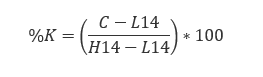

where: <br>
C = the most recent closing price <br>
L14: the minimum price in the last 14 days<br>
H14: the maximum price in the last 14 days

In [80]:
periods = 34 #do otimizador

In [81]:
data["roll_low"] = data.Low.rolling(periods).min()

In [82]:
data["roll_high"] = data.High.rolling(periods).max()

In [83]:
data

,High,Low,Open,Close,roll_low,roll_high
Date,,,,,,
2016-01-01,436.246002,427.515015,430.721008,434.334015,NaN,NaN
2016-01-02,436.062012,431.869995,434.622009,433.437988,NaN,NaN
2016-01-03,433.743011,424.705994,433.578003,430.010986,NaN,NaN
2016-01-04,434.516998,429.084015,430.061005,433.091003,NaN,NaN
2016-01-05,434.182007,429.675995,433.069000,431.959991,NaN,NaN
...,...,...,...,...,...,...
2021-02-26,48370.785156,44454.843750,47180.464844,46339.761719,29367.138672,58330.570312
2021-02-27,48253.269531,45269.027344,46344.773438,46188.453125,29367.138672,58330.570312
2021-02-28,46716.429688,43241.617188,46194.015625,45137.769531,29367.138672,58330.570312


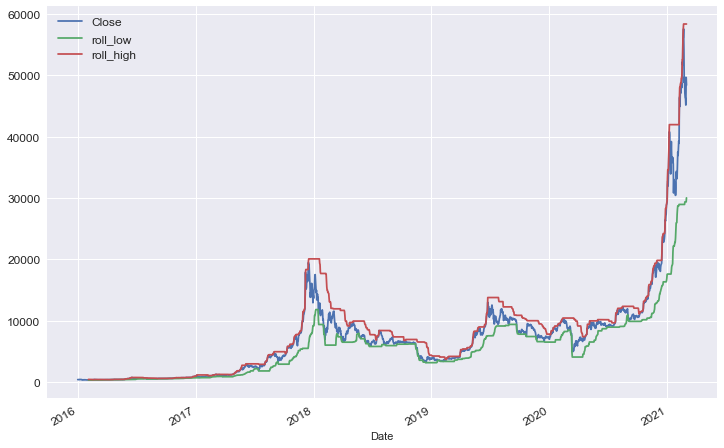

In [84]:
data.loc[:, ["Close", "roll_low", "roll_high"]].plot(figsize = (12, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

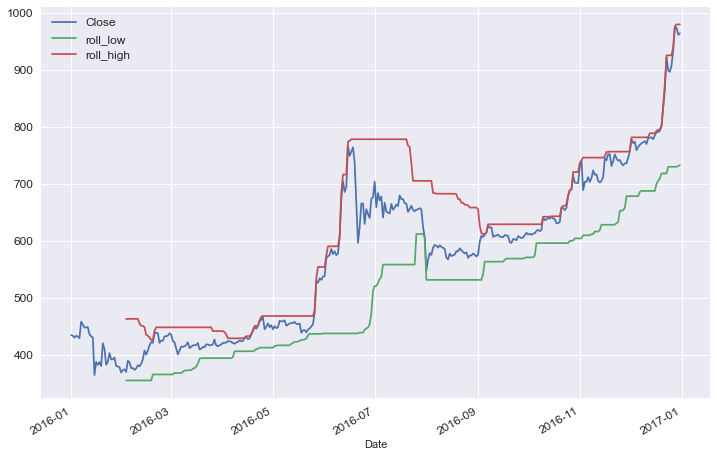

In [85]:
data.loc["2016", ["Close", "roll_low", "roll_high"]].plot(figsize = (12, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [86]:
data["K"] = (data.Close - data.roll_low) / (data.roll_high - data.roll_low) * 100

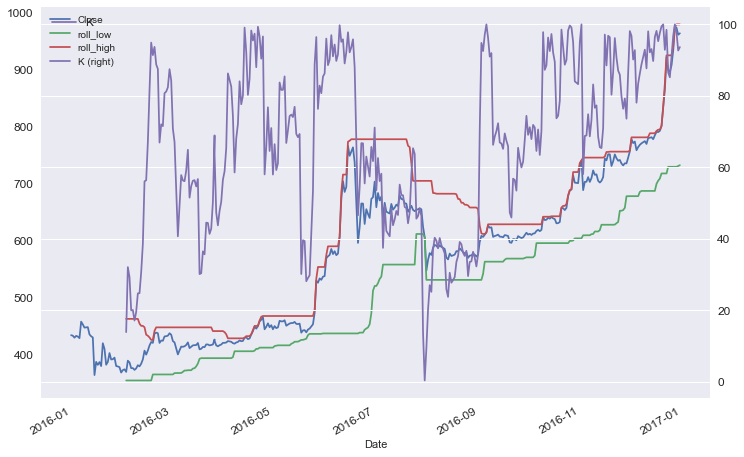

In [87]:
data.loc["2016", ["Close", "roll_low", "roll_high", "K"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "K")
plt.legend(fontsize = 12)
plt.show()

In [88]:
moving_av = 5 #do otimizador

In [89]:
data["D"] = data.K.rolling(moving_av).mean()

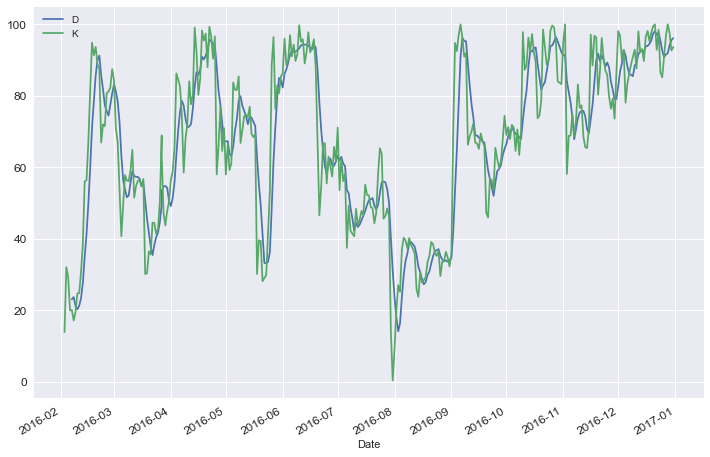

In [90]:
data.loc["2016", ["D", "K"]].plot(figsize = (12, 8), fontsize = 12)
plt.show()

In [91]:
data["position"] = np.where(data["K"] > data["D"], 1, -1)

In [92]:
data

,High,Low,Open,Close,roll_low,roll_high,K,D,position
Date,,,,,,,,,
2016-01-01,436.246002,427.515015,430.721008,434.334015,NaN,NaN,NaN,NaN,-1
2016-01-02,436.062012,431.869995,434.622009,433.437988,NaN,NaN,NaN,NaN,-1
2016-01-03,433.743011,424.705994,433.578003,430.010986,NaN,NaN,NaN,NaN,-1
2016-01-04,434.516998,429.084015,430.061005,433.091003,NaN,NaN,NaN,NaN,-1
2016-01-05,434.182007,429.675995,433.069000,431.959991,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...
2021-02-26,48370.785156,44454.843750,47180.464844,46339.761719,29367.138672,58330.570312,58.600180,68.809833,-1
2021-02-27,48253.269531,45269.027344,46344.773438,46188.453125,29367.138672,58330.570312,58.077767,63.232496,-1
2021-02-28,46716.429688,43241.617188,46194.015625,45137.769531,29367.138672,58330.570312,54.450146,60.594310,-1


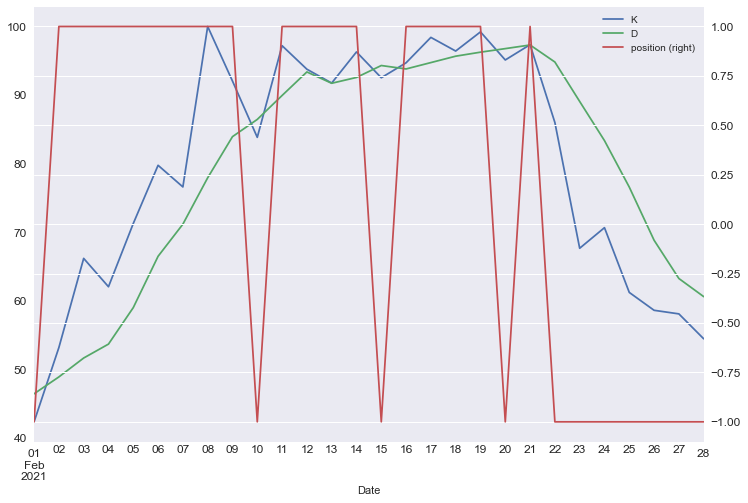

In [93]:
data.loc["02-2021", ["K", "D", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position")
plt.show()

## Vectorized Strategy Backtesting

In [94]:
data

,High,Low,Open,Close,roll_low,roll_high,K,D,position
Date,,,,,,,,,
2016-01-01,436.246002,427.515015,430.721008,434.334015,NaN,NaN,NaN,NaN,-1
2016-01-02,436.062012,431.869995,434.622009,433.437988,NaN,NaN,NaN,NaN,-1
2016-01-03,433.743011,424.705994,433.578003,430.010986,NaN,NaN,NaN,NaN,-1
2016-01-04,434.516998,429.084015,430.061005,433.091003,NaN,NaN,NaN,NaN,-1
2016-01-05,434.182007,429.675995,433.069000,431.959991,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...
2021-02-26,48370.785156,44454.843750,47180.464844,46339.761719,29367.138672,58330.570312,58.600180,68.809833,-1
2021-02-27,48253.269531,45269.027344,46344.773438,46188.453125,29367.138672,58330.570312,58.077767,63.232496,-1
2021-02-28,46716.429688,43241.617188,46194.015625,45137.769531,29367.138672,58330.570312,54.450146,60.594310,-1


In [95]:
data["returns"] = np.log(data.Close.div(data.Close.shift(1)))

In [96]:
data.dropna(inplace = True)

In [97]:
data

,High,Low,Open,Close,roll_low,roll_high,K,D,position,returns
Date,,,,,,,,,,
2016-02-07,380.871002,374.903015,376.514008,376.619995,354.914001,462.933990,20.094423,23.081654,-1,0.000260
2016-02-08,379.878998,373.334015,376.756989,373.446991,354.914001,462.933990,17.157000,23.729309,-1,-0.008461
2016-02-09,377.246002,372.898010,373.423004,376.028992,354.914001,462.933990,19.547299,21.217737,-1,0.006890
2016-02-10,385.483002,375.782990,376.145996,381.648987,354.914001,462.933990,24.750035,20.310493,1,0.014835
2016-02-11,383.130005,376.398987,382.114014,379.653992,354.914001,454.640015,24.807961,21.271344,1,-0.005241
...,...,...,...,...,...,...,...,...,...,...
2021-02-26,48370.785156,44454.843750,47180.464844,46339.761719,29367.138672,58330.570312,58.600180,68.809833,-1,-0.016142
2021-02-27,48253.269531,45269.027344,46344.773438,46188.453125,29367.138672,58330.570312,58.077767,63.232496,-1,-0.003271
2021-02-28,46716.429688,43241.617188,46194.015625,45137.769531,29367.138672,58330.570312,54.450146,60.594310,-1,-0.023010


In [98]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [99]:
data

,High,Low,Open,Close,roll_low,roll_high,K,D,position,returns,strategy
Date,,,,,,,,,,,
2016-02-07,380.871002,374.903015,376.514008,376.619995,354.914001,462.933990,20.094423,23.081654,-1,0.000260,NaN
2016-02-08,379.878998,373.334015,376.756989,373.446991,354.914001,462.933990,17.157000,23.729309,-1,-0.008461,0.008461
2016-02-09,377.246002,372.898010,373.423004,376.028992,354.914001,462.933990,19.547299,21.217737,-1,0.006890,-0.006890
2016-02-10,385.483002,375.782990,376.145996,381.648987,354.914001,462.933990,24.750035,20.310493,1,0.014835,-0.014835
2016-02-11,383.130005,376.398987,382.114014,379.653992,354.914001,454.640015,24.807961,21.271344,1,-0.005241,-0.005241
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-26,48370.785156,44454.843750,47180.464844,46339.761719,29367.138672,58330.570312,58.600180,68.809833,-1,-0.016142,0.016142
2021-02-27,48253.269531,45269.027344,46344.773438,46188.453125,29367.138672,58330.570312,58.077767,63.232496,-1,-0.003271,0.003271
2021-02-28,46716.429688,43241.617188,46194.015625,45137.769531,29367.138672,58330.570312,54.450146,60.594310,-1,-0.023010,0.023010


In [100]:
data.dropna(inplace = True)

In [101]:
ptc = 0.00007

In [102]:
data["trades"] = data.position.diff().fillna(0).abs()

In [103]:
data.trades.value_counts()

0.0    1345
2.0     501
Name: trades, dtype: int64

In [104]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [105]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
data["cstrategy_net"] = data["strategy_net"].cumsum().apply(np.exp)

In [106]:
data

,High,Low,Open,Close,roll_low,roll_high,K,D,position,returns,strategy,trades,strategy_net,creturns,cstrategy,cstrategy_net
Date,,,,,,,,,,,,,,,,
2016-02-08,379.878998,373.334015,376.756989,373.446991,354.914001,462.933990,17.157000,23.729309,-1,-0.008461,0.008461,0.0,0.008461,0.991575,1.008497,1.008497
2016-02-09,377.246002,372.898010,373.423004,376.028992,354.914001,462.933990,19.547299,21.217737,-1,0.006890,-0.006890,0.0,-0.006890,0.998431,1.001572,1.001572
2016-02-10,385.483002,375.782990,376.145996,381.648987,354.914001,462.933990,24.750035,20.310493,1,0.014835,-0.014835,2.0,-0.014975,1.013353,0.986823,0.986685
2016-02-11,383.130005,376.398987,382.114014,379.653992,354.914001,454.640015,24.807961,21.271344,1,-0.005241,-0.005241,0.0,-0.005241,1.008056,0.981665,0.981527
2016-02-12,384.954010,379.600006,379.686005,384.263000,354.914001,450.661987,30.652341,23.382927,1,0.012067,0.012067,0.0,0.012067,1.020294,0.993582,0.993443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-26,48370.785156,44454.843750,47180.464844,46339.761719,29367.138672,58330.570312,58.600180,68.809833,-1,-0.016142,0.016142,0.0,0.016142,123.041162,371.542383,346.423822
2021-02-27,48253.269531,45269.027344,46344.773438,46188.453125,29367.138672,58330.570312,58.077767,63.232496,-1,-0.003271,0.003271,0.0,0.003271,122.639408,372.759518,347.558671
2021-02-28,46716.429688,43241.617188,46194.015625,45137.769531,29367.138672,58330.570312,54.450146,60.594310,-1,-0.023010,0.023010,0.0,0.023010,119.849637,381.436338,355.648884


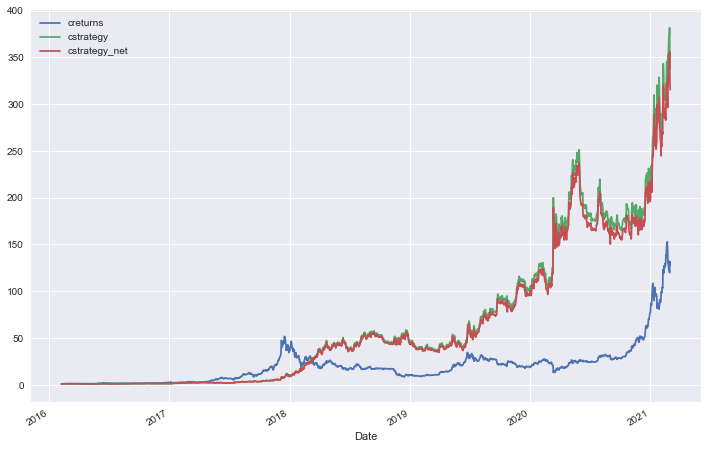

In [107]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

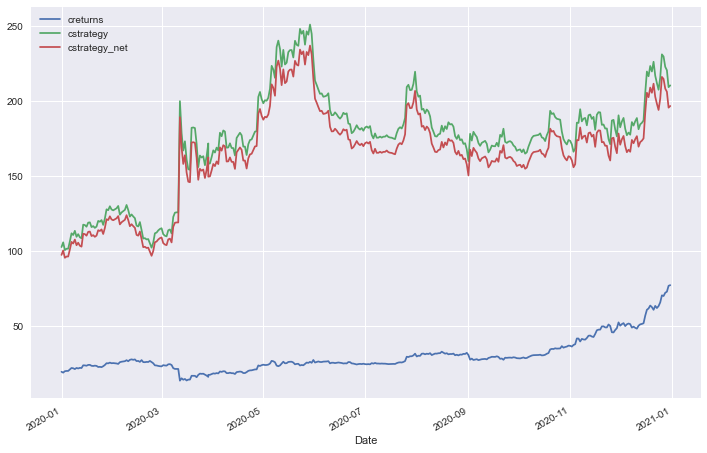

In [108]:
data.loc["2020", ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

## Using the SOBacktester Class

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn")

In [38]:
class SOBacktester(): 
    ''' Class for the vectorized backtesting of SO-based trading strategies.

    Attributes
    ==========
    symbol: str
        ticker symbol with which to work with
    periods: int
        time window in days for rolling low/high
    D_mw: int
        time window in days for %D line
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval
    tc: float
        proportional transaction costs per trade
        
        
    Methods
    =======
    get_data:
        retrieves and prepares the data
        
    set_parameters:
        sets one or two new SO parameters
        
    test_strategy:
        runs the backtest for the SO-based strategy
        
    plot_results:
        plots the performance of the strategy compared to buy and hold
        
    update_and_run:
        updates SO parameters and returns the negative absolute performance (for minimization algorithm)
        
    optimize_parameters:
        implements a brute force optimization for the two SO parameters
    '''
    
    def __init__(self, symbol, periods, D_mw, start, end, tc):
        self.symbol = symbol
        self.periods = periods
        self.D_mw = D_mw
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None 
        self.get_data()
        
    def __repr__(self):
        return "SOBacktester(symbol = {}, periods = {}, D_mw = {}, start = {}, end = {})".format(self.symbol, self.periods, self.D_mw, self.start, self.end)
        
    def get_data(self):
        ''' Retrieves and prepares the data.
        '''
        raw = pd.read_csv("BTC.csv", parse_dates = [0], index_col = 0)
        raw = raw.dropna()
        raw = raw.loc[self.start:self.end]
        raw["returns"] = np.log(raw.Close / raw.Close.shift(1))
        raw["roll_low"] = raw.Low.rolling(self.periods).min()
        raw["roll_high"] = raw.High.rolling(self.periods).max()
        raw["K"] = (raw.Close - raw.roll_low) / (raw.roll_high - raw.roll_low) * 100
        raw["D"] = raw.K.rolling(self.D_mw).mean()
        self.data = raw
        
    def set_parameters(self, periods = None, D_mw = None):
        ''' Updates SO parameters and resp. time series.
        '''
        if periods is not None:
            self.periods = periods
            self.data["roll_low"] = self.data.Low.rolling(self.periods).min()
            self.data["roll_high"] = self.data.High.rolling(self.periods).max()
            self.data["K"] = (self.data.Close - self.data.roll_low) / (self.data.roll_high - self.data.roll_low) * 100
            self.data["D"] = self.data.K.rolling(self.D_mw).mean() 
        if D_mw is not None:
            self.D_mw = D_mw
            self.data["D"] = self.data.K.rolling(self.D_mw).mean()
            
    def test_strategy(self):
        ''' Backtests the trading strategy.
        '''
        data = self.data.copy().dropna()
        data["position"] = np.where(data["K"] > data["D"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        
        # determine when a trade takes place
        data["trades"] = data.position.diff().fillna(0).abs()
        trades=data.trades.value_counts()
        
        # subtract transaction costs from return when trade takes place
        data.strategy = data.strategy - data.trades * self.tc
        
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        perf = data["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperf = perf - data["creturns"].iloc[-1] # out-/underperformance of strategy
        return round(perf, 6), round(outperf, 6), trades
    
    def plot_results(self):
        ''' Plots the cumulative performance of the trading strategy
        compared to buy and hold.
        '''
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = "{} | periods = {}, D_mw = {} | TC = {}".format(self.symbol, self.periods, self.D_mw, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
        
    def update_and_run(self, SO):
        ''' Updates SO parameters and returns the negative absolute performance (for minimization algorithm).

        Parameters
        ==========
        SO: tuple
            SO parameter tuple
        '''
        self.set_parameters(int(SO[0]), int(SO[1]))
        return -self.test_strategy()[0]
    
    def optimize_parameters(self, periods_range, D_mw_range):
        ''' Finds global maximum given the SO parameter ranges.

        Parameters
        ==========
        periods_range, D_mw_range: tuple
            tuples of the form (start, end, step size)
        '''
        opt = brute(self.update_and_run, (periods_range, D_mw_range), finish=None)
        return opt, -self.update_and_run(opt)

In [57]:
tester = SOBacktester("BTC", 14, 3, "2016-01-01", "2020-12-31", 0)

In [58]:
tester

SOBacktester(symbol = BTC, periods = 14, D_mw = 3, start = 2016-01-01, end = 2020-12-31)

In [59]:
tester.data

,High,Low,Open,Close,returns,roll_low,roll_high,K,D
Date,,,,,,,,,
2016-01-01,436.246002,427.515015,430.721008,434.334015,NaN,NaN,NaN,NaN,NaN
2016-01-02,436.062012,431.869995,434.622009,433.437988,-0.002065,NaN,NaN,NaN,NaN
2016-01-03,433.743011,424.705994,433.578003,430.010986,-0.007938,NaN,NaN,NaN,NaN
2016-01-04,434.516998,429.084015,430.061005,433.091003,0.007137,NaN,NaN,NaN,NaN
2016-01-05,434.182007,429.675995,433.069000,431.959991,-0.002615,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-27,28288.839844,25922.769531,26439.373047,26272.294922,-0.006251,19012.708984,28288.839844,78.260926,91.353644
2020-12-28,27389.111328,26207.640625,26280.822266,27084.808594,0.030458,19079.841797,28288.839844,86.925491,87.222116
2020-12-29,27370.720703,25987.298828,27081.810547,27362.437500,0.010198,19298.316406,28288.839844,89.695791,84.960736


In [60]:
tester.test_strategy()

(4.1996,
 -70.636596,
 0.0    1059
 2.0     748
 Name: trades, dtype: int64)

In [61]:
tester.results

,High,Low,Open,Close,returns,roll_low,roll_high,K,D,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,,,,,,
2016-01-17,390.964996,380.092010,387.152008,382.299011,-0.013606,354.914001,462.933990,25.351798,18.517258,1,-0.013606,0.0,0.986486,0.986486
2016-01-18,388.104004,376.665009,381.733002,387.167999,0.012656,354.914001,462.933990,29.859286,28.470353,1,0.012656,0.0,0.999050,0.999050
2016-01-19,387.730011,378.971985,387.026001,380.148987,-0.018295,354.914001,462.933990,23.361403,26.190829,-1,-0.018295,2.0,0.980938,0.980938
2016-01-20,425.266998,376.598999,379.739990,420.230011,0.100239,354.914001,462.933990,60.466595,37.895762,1,-0.100239,2.0,1.084364,0.887378
2016-01-21,422.877014,406.299988,419.631989,410.261993,-0.024006,354.914001,462.933990,51.238657,45.022219,1,-0.024006,0.0,1.058642,0.866329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,28288.839844,25922.769531,26439.373047,26272.294922,-0.006251,19012.708984,28288.839844,78.260926,91.353644,-1,-0.006251,2.0,67.793171,4.126632
2020-12-28,27389.111328,26207.640625,26280.822266,27084.808594,0.030458,19079.841797,28288.839844,86.925491,87.222116,-1,-0.030458,0.0,69.889785,4.002837
2020-12-29,27370.720703,25987.298828,27081.810547,27362.437500,0.010198,19298.316406,28288.839844,89.695791,84.960736,1,-0.010198,2.0,70.606180,3.962223


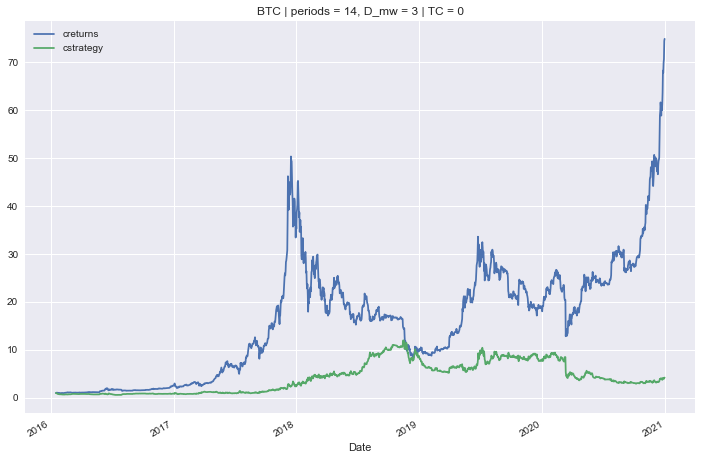

In [62]:
tester.plot_results()

In [63]:
tester.results.trades.value_counts()

0.0    1059
2.0     748
Name: trades, dtype: int64

In [64]:
tester.optimize_parameters((10, 100, 1), (3, 50, 1))

(array([34.,  5.]), 210.501711)

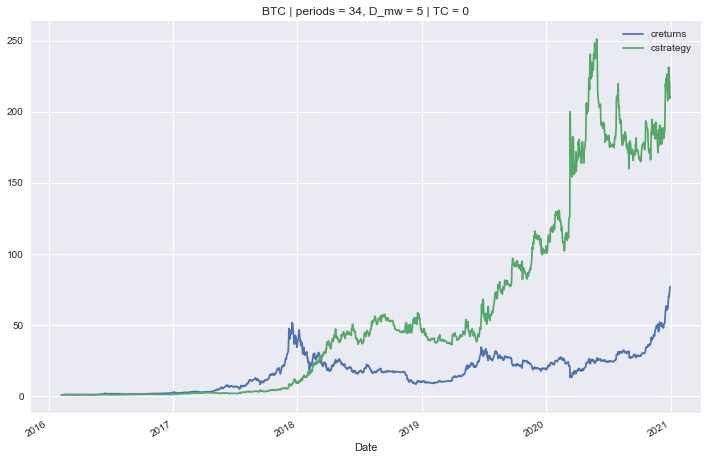

In [65]:
tester.plot_results()

In [66]:
tester.results.trades.value_counts()

0.0    1302
2.0     483
Name: trades, dtype: int64

In [67]:
tester.test_strategy()

(210.501711,
 133.49645,
 0.0    1302
 2.0     483
 Name: trades, dtype: int64)

## Alternative Strategies and Interpretations

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn")
from SOBacktester import SOBacktester as SO

In [50]:
tester = SOBacktester("BTC", 27, 11, "2016-01-01", "2020-12-31", 0)

In [51]:
alt = tester.data.dropna()
alt

,High,Low,Open,Close,returns,roll_low,roll_high,K,D
Date,,,,,,,,,
2016-02-06,386.631012,372.386993,386.588989,376.522003,-0.026282,354.914001,450.661987,22.567578,23.356736
2016-02-07,380.871002,374.903015,376.514008,376.619995,0.000260,354.914001,448.182007,23.272711,22.101177
2016-02-08,379.878998,373.334015,376.756989,373.446991,-0.008461,354.914001,435.186005,23.087738,22.064515
2016-02-09,377.246002,372.898010,373.423004,376.028992,0.006890,354.914001,433.324005,26.928949,22.445644
2016-02-10,385.483002,375.782990,376.145996,381.648987,0.014835,354.914001,430.255005,35.485306,23.707213
...,...,...,...,...,...,...,...,...,...
2020-12-27,28288.839844,25922.769531,26439.373047,26272.294922,-0.006251,17619.533203,28288.839844,81.099569,91.312481
2020-12-28,27389.111328,26207.640625,26280.822266,27084.808594,0.030458,17619.533203,28288.839844,88.715000,91.330731
2020-12-29,27370.720703,25987.298828,27081.810547,27362.437500,0.010198,17619.533203,28288.839844,91.317127,91.170618


__Main Strategy: Fast Stochastic (%K) / Slow Stochastic (%D) Crossover__

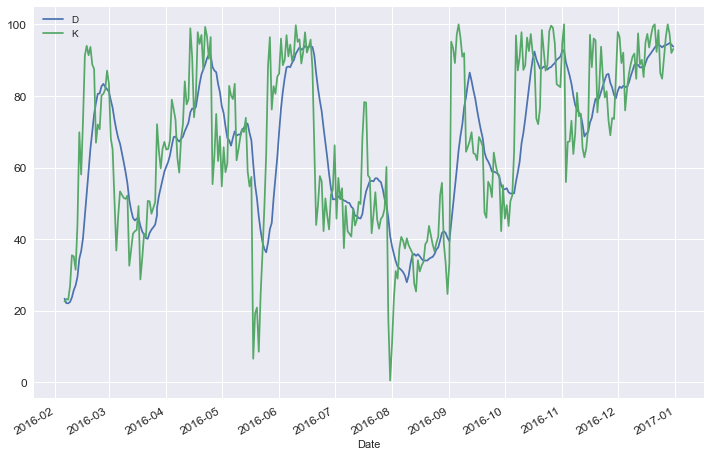

In [52]:
alt.loc["2016", ["D", "K"]].plot(figsize = (12, 8), fontsize = 12)
plt.show()

__Alternative 1: 50-Level Crossover__

In [53]:
alt2 = alt.loc["2016"].copy()

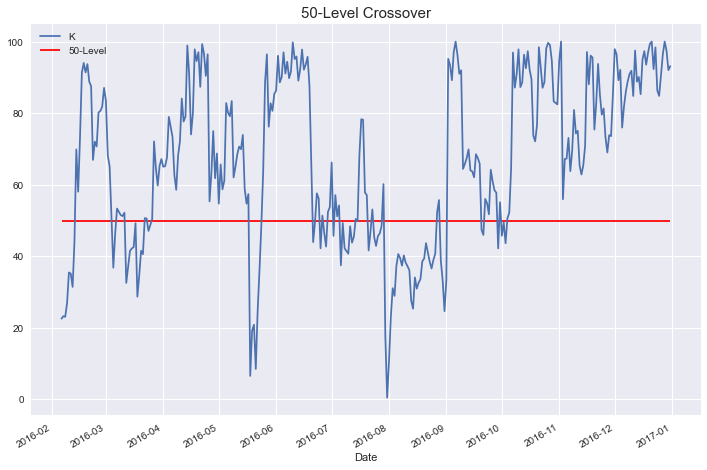

In [54]:
alt2.loc[:, "K"].plot(figsize = (12, 8))
plt.hlines(y = 50, xmin = alt2.index[0], xmax = alt2.index[-1], color = "r", label = "50-Level")
plt.title("50-Level Crossover", fontsize = 15)
plt.legend()
plt.show()

__Alternative 2: Overbought (80) & Oversold (20)__

- if __Fast Stochastic (%K)__ reaches __extreme highs__ (>80) -> __Overbought__
- if __Fast Stochastic (%K)__ reaches __extreme lows__ (<20) -> __Oversold__

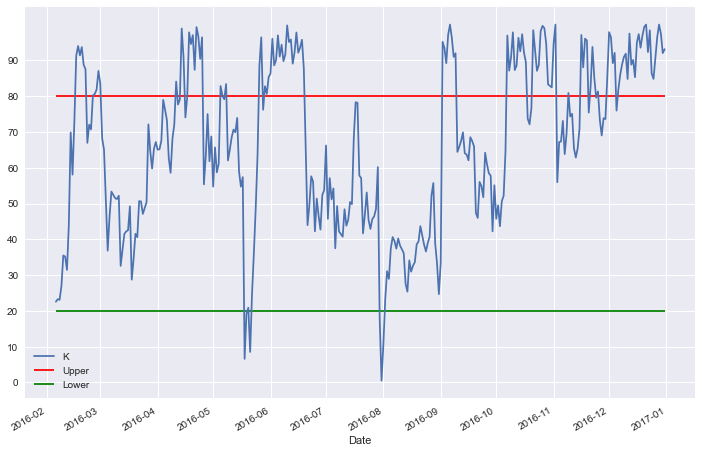

In [55]:
alt2.loc[:, ["K"]].plot(figsize = (12, 8))
plt.hlines(y = 80, xmin = alt2.index[0], xmax = alt2.index[-1], label = "Upper", color = "r")
plt.hlines(y = 20, xmin = alt2.index[0], xmax = alt2.index[-1], label = "Lower", color = "g")
plt.yticks(ticks = range(0, 100, 10))
plt.legend()
plt.show()